<>:59: SyntaxWarning: invalid escape sequence '\o'
<>:59: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11120\1736492511.py:59: SyntaxWarning: invalid escape sequence '\o'
  axs[0].set_ylabel('Velocidad angular $\omega(t)$ (rad/s)', color='b')


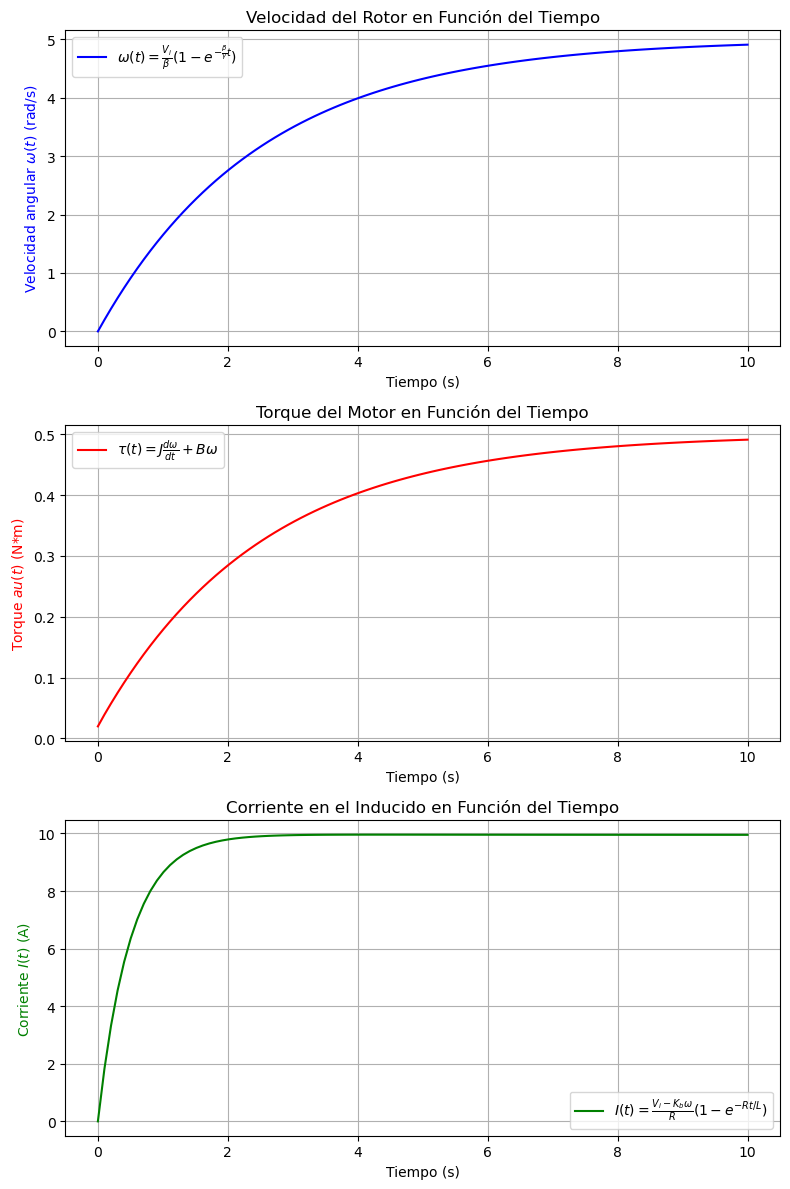

Solución en el dominio del tiempo obtenida con Laplace:
250.0*Vi*(0.208333333333333*exp(-10.0*T)*Heaviside(T) - 0.00833333333333333*exp(-0.4*T)*Heaviside(T))


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Parámetros del modelo
Vi = 10      # Voltaje de entrada (ejemplo)
beta = 2     # Constante del sistema (ejemplo)
gamma = 5    # Otra constante del sistema (ejemplo)
J = 0.01     # Momento de inercia (kg*m^2)
B = 0.1      # Coeficiente de fricción viscosa (N*m*s/rad)
R = 1        # Resistencia del inducido (Ohm)
L = 0.5      # Inductancia del inducido (H)
Kb = 0.01    # Constante de FEM

# Definir la ecuación de velocidad del rotor
def velocidad_rotor(t, Vi, beta, gamma):
    return (Vi / beta) * (1 - np.exp(- (beta / gamma) * t))

# Definir la ecuación de torque del motor
def torque_motor(omega, J, B):
    return J * np.gradient(omega, t) + B * omega

# Definir la ecuación de la corriente en el inducido
def corriente_inducido(t, Vi, R, L, Kb, omega):
    return (Vi - Kb * omega) / R * (1 - np.exp(-R * t / L))

# Generar valores de tiempo
t = np.linspace(0, 10, 100)  # De 0 a 10 segundos con 100 puntos

# Calcular la velocidad del rotor
omega_t = velocidad_rotor(t, Vi, beta, gamma)

# Calcular el torque del motor
torque_t = torque_motor(omega_t, J, B)

# Calcular la corriente en el inducido
i_t = corriente_inducido(t, Vi, R, L, Kb, omega_t)

# Transformada de Laplace
s = sp.symbols('s')
T, Omega = sp.symbols('T Omega')
Vi_sym = sp.symbols('Vi')

# Ecuación diferencial en el dominio del tiempo
eq_laplace = sp.Eq((J * s + B) * Omega, Vi_sym / beta * (s / (s + beta / gamma)))

# Resolver para Omega(s)
omega_s = sp.solve(eq_laplace, Omega)[0]

# Transformada inversa de Laplace para obtener ω(t)
omega_t_laplace = sp.inverse_laplace_transform(omega_s, s, T)

# Graficar los resultados
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Gráfica de la velocidad angular
axs[0].plot(t, omega_t, label=r'$\omega(t) = \frac{V_i}{\beta} (1 - e^{-\frac{\beta}{\gamma} t})$', color='b')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Velocidad angular $\omega(t)$ (rad/s)', color='b')
axs[0].set_title('Velocidad del Rotor en Función del Tiempo')
axs[0].legend()
axs[0].grid()

# Gráfica del torque
axs[1].plot(t, torque_t, label=r'$\tau(t) = J \frac{d\omega}{dt} + B \omega$', color='r')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Torque $\tau(t)$ (N*m)', color='r')
axs[1].set_title('Torque del Motor en Función del Tiempo')
axs[1].legend()
axs[1].grid()

# Gráfica de la corriente en el inducido
axs[2].plot(t, i_t, label=r'$I(t) = \frac{V_i - K_b \omega}{R} (1 - e^{-Rt/L})$', color='g')
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_ylabel('Corriente $I(t)$ (A)', color='g')
axs[2].set_title('Corriente en el Inducido en Función del Tiempo')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

# Mostrar solución en el dominio del tiempo
print("\033[94mSolución en el dominio del tiempo obtenida con Laplace:\033[0m")
print(omega_t_laplace)
